In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime


Define start date and end date variables (must match options)

In [2]:
start_date = pd.Timestamp('2024-03-22')
end_date = pd.Timestamp('2024-03-27')

Import data

                     NS_SQUID   Z_SQUID  NS_Fluxgate  EW_Fluxgate  Z_Fluxgate  \
2024-03-22 00:00:00 -0.047045 -0.047136     0.190536     0.052403    0.194030   
2024-03-22 00:01:00 -0.046252 -0.045747     0.196774     0.059411    0.198946   
2024-03-22 00:02:00 -0.043884 -0.043097     0.201556     0.064224    0.206034   
2024-03-22 00:03:00 -0.042313 -0.043096     0.213592     0.073036    0.216025   
2024-03-22 00:04:00 -0.039798 -0.041110     0.217293     0.077119    0.218021   
...                       ...       ...          ...          ...         ...   
2024-03-24 17:28:00  0.249307  0.098182     0.282150     0.094563    0.081665   
2024-03-24 17:29:00  0.253300  0.102489     0.286330     0.100228    0.090893   
2024-03-24 17:30:00  0.254005  0.101832     0.294737     0.114582    0.098620   
2024-03-24 17:31:00  0.252964  0.100362     0.298101     0.121296    0.102546   
2024-03-24 17:32:00  0.257553  0.104777     0.300596     0.115740    0.106028   

                     H Comp

/var/folders/xc/v6tb2xnd0r17mbd2bzzfq3_00000gn/T/ipykernel_96039/1407780592.py:17: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_df = pd.concat([combined_df, day_df])
/var/folders/xc/v6tb2xnd0r17mbd2bzzfq3_00000gn/T/ipykernel_96039/1407780592.py:17: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_df = pd.concat([combined_df, day_df])
/var/folders/xc/v6tb2xnd0r17mbd2bzzfq3_00000gn/T/ipykernel_96039/1407780592.py:17: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer

<Axes: >

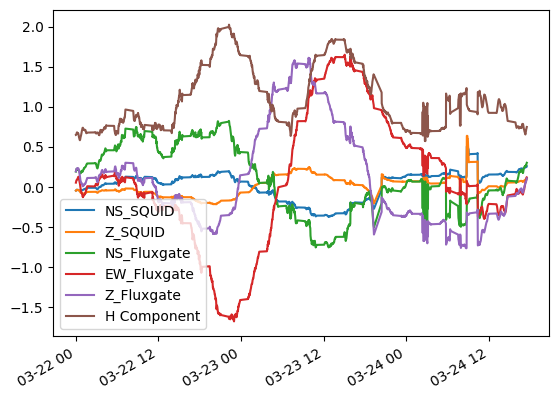

In [3]:
def combine_resampled_data(start_date, end_date):
  """Combines resampled data from multiple CSV files into a single DataFrame.

  Args:
    start_date: Start date for combining data.
    end_date: End date for combining data.

  Returns:
    Combined Pandas DataFrame containing resampled data for all days.
  """

  combined_df = pd.DataFrame()
  for day in pd.date_range(start_date, end_date, freq='D'):
    filename = f'/Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Data/RESAMPLED/{day.strftime("%Y-%m-%d")}.csv'
    day_df = pd.read_csv(filename, index_col=0, parse_dates=True, dtype=np.float32, skip_blank_lines=True)
    day_df = day_df.dropna()
    combined_df = pd.concat([combined_df, day_df])

  combined_df.sort_index(inplace=True)  # Sort the combined DataFrame by index

  return combined_df

combined_data = combine_resampled_data(start_date, end_date)
print(combined_data)
combined_data.plot()

### Isolation Forest

Split the dataset

In [ ]:
# X_train, X_test = train_test_split(df.drop(index = 1), test_size=0.3, random_state=42)
# print(f'Train dataset:\n',X_train)
# print(f'Test dataset: :\n', X_test)

Isolation Forest

In [ ]:
# initialize and fit the model
outliers_fraction = float(.01)
model = IsolationForest(contamination=outliers_fraction)
X = df['H Component']
X = pd.DataFrame(X)
model.fit(X)

Now predict

In [ ]:
X['anomaly'] = model.predict(X)
print(f"Proportion of anomalyies:", (X[X['anomaly'] == -1].shape[0])/(X.shape[0])*100, " %")
# rint(df[df['anomaly'] == -1].shape[0]) # sum the number of -1 entries

(X
 .anomaly
 .value_counts(normalize=True)
 .rename(index={1: 'Normal', -1: 'Anomaly'})
 .plot.pie()
)

Now Visualize

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
a = X.loc[X['anomaly'] == -1, ['H Component']] #anomaly
ax.plot(X.index, X['H Component'], color='black', label = 'Normal')
ax.scatter(a.index,a['H Component'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

# Make the problem supervised

Now add column to indicate solar storm presence

In [ ]:
# These are the most active days in the last year

['2024-05-11',
 '2024-05-10',
 '2024-08-12',
 '2024-05-12',
 '2024-03-24',
 '2024-08-13',
 '2024-04-19',
 '2024-08-04',
 '2024-03-03',
 '2024-06-28',
 '2024-05-13',
 '2024-05-17',
 '2024-05-02',
 '2024-05-18',
 '2024-05-16',
 '2024-03-25',
 '2024-03-04']


Now we visualize the analoumous data

In [ ]:
y_pred = clf.predict(X)
X[y_pred == -1] # anomalies

Define Mahalanobis model

In [ ]:
# Define the Elliptic Envelope
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(df)
# Create column that shows anomaly status
df['Anomaly or Not'] = el.predict(df)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(df['Var 1'], d['Var 2'], c = df['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()

Predict the anomalies in the data

Visulization

In [ ]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')